<div style="text-align: center; background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1;border-radius:20px">
<h1>
<img src="attachment:ad875bdc-e197-4e27-89b8-d7ae35871848.png" width="28px">
<i class="fal fa-analytics" style="color: #3e18c9;"></i> 
Data Wrangling (Preprocessing, EDA and Predictions)
</h1>
</div>

<center><img src='https://github.com/etietopabraham/Competent_Profiles/blob/0bf6491016a0377be984d72fb1b87429b3403b49/notebook/images/01.png?raw=true' width=444px/></center>

<a id="top"></a>

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px"> Table of Contents 📝</h3>

<div style="font-size:16px; border-radius:15px; background-color:#f7f7f7; padding:10px;">
    <ol type="1">
        <li style="margin-bottom:10px;"><a href="#1" style="text-decoration:none;">About Dataset 📁</a></li>
        <li style="margin-bottom:10px;"><a href="#2" style="text-decoration:none;">Notebook Objectives 🔎</a></li>
        <li style="margin-bottom:10px;"><a href="#3" style="text-decoration:none;">Import Necessary Libraries ✅</a></li>
        <li style="margin-bottom:10px;"><a href="#3" style="text-decoration:none;">Load and Clean Data 📡</a>
            <ul>
                <li style="margin-bottom:10px;"><a href="#3.1" style="text-decoration:none;">4.1. Find duplicate records 💀</a></li>
                <li style="margin-bottom:10px;"><a href="#3.2" style="text-decoration:none;">4.2. Drop unnecessary features 💧</a></li>
                <li style="margin-bottom:10px;"><a href="#3.2" style="text-decoration:none;">4.3. Find missing values💧</a></li>
            </ul>
        </li>
        <li style="margin-bottom:10px;"><a href="#3" style="text-decoration:none;">5. Univariate Analysis of each Feature (Categorical & Numeric) 📊</a>
            <ul>
                <li style="margin-bottom:10px;"><a href="#3.1" style="text-decoration:none;">5.1. Categorical Column: Experience Level 🧟 </a></li>
                <li style="margin-bottom:10px;"><a href="#3.2" style="text-decoration:none;">5.2. Categorical Column: Job Titles 👔 ¶</a></li>
            </ul>
        </li>
    </ol>
</div>

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px"> 1. About Dataset 📁</h3>

The dataset, titled 'Data Science Job Salaries', encapsulates vital information about salaries in data science roles across various parameters. 
The dataset is organized into 11 columns, each offering distinct insights. Here is a brief overview of each:

1. **`work_year`**: This feature records the year in which the salary was paid, thus providing a timeline for our data.

2. **`experience_level`**: This categorical feature signifies the experience level of the employee in their job during that year, categorized as Junior, Intermediate, Senior, or Executive.

3. **`employment_type`**: This feature indicates the type of employment for the role such as Full-Time, Part-Time, Contract, or Freelance.

4. **`job_title`**: This feature represents the role or position held by the employee during that year.

5. **`salary`**: This is the total gross salary amount paid to the employee for that year, in the original currency.

6. **`salary_currency`**: This feature provides the ISO 4217 code of the currency in which the salary was paid.

7. **`salary_in_usd`**: The salary converted to United States Dollars (USD) for standardization and comparability.

8. **`employee_residence`**: This feature records the employee's primary country of residence during the work year, encoded as an ISO 3166 country code.

9. **`remote_ratio`**: This feature provides a quantifiable measure of the overall amount of work done remotely by the employee.

10. **`company_location`**: This denotes the country where the employer's main office or contracting branch is located, represented as an ISO 3166 country code.

11. **`company_size`**: This feature indicates the median number of people that worked for the company during the year, providing insights into the scale of the organization.

💡 By analyzing this dataset, we aim to glean valuable insights into salary trends, impact of experience and role on earnings, and influence of company size and location on remuneration in the field of data science.

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px"> 2. Notebook Objectives 🔎</h3>

1. 🥷 Explore every feature in dataset.
2. 🕵🏾‍♀️ Work Year analysis with respect to salary, and remote ratio
3. 👨🏾‍💻 Experience Level analysis with respect to Employment Type, Top 5 Job Titles, and Company Size
4. ⚓ Company Location Analysis with respect to Experience Level
5. 💰 Salary Analysis with respect to Work Year, Experience Level, Company Size, Job Title, Company Location, and Remote Ratio


<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px"> 3. Import Necessary Libraries ✅ </h3>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#install 
!pip3 install country_converter
!pip3 install missingno

# libraries for Data Manipulation
import pandas as pd
import numpy as np
import country_converter as coco

# libraies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.colors as colors
import matplotlib.colors as mcolors
import missingno as msno
import plotly.figure_factory as ff

# libraries for Machine Learning
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import nltk

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_32309/4143533702.py:59: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


<h3 style="text-align: center;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">4. Load and Clean Data 📡 </h3>

In [3]:
# Read data from input
df = pd.read_csv('data/ds_salaries.csv')

In [4]:
# Let's see what the data looks like
df.sample(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
125,125,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
445,445,2022,MI,FT,Data Engineer,70000,EUR,76940,GR,100,GR,M
395,395,2022,SE,FT,Data Analytics Manager,105400,USD,105400,US,100,US,M
49,49,2020,MI,FT,Data Engineer,61500,EUR,70139,FR,50,FR,L
282,282,2021,MI,PT,Data Engineer,59000,EUR,69741,NL,100,NL,L


<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px"> 4.1. Find duplicate records 💀 </h3>

In [5]:
df.duplicated().sum()

0

📌 **Observation**

There are **no duplicate records** found

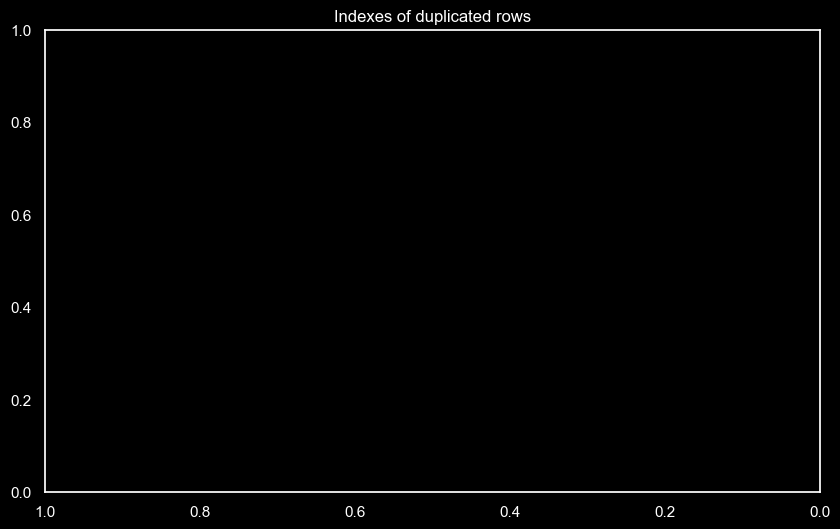

In [6]:
# Identify the duplicate rows
duplicated_rows = df.duplicated()

# Create a new DataFrame to store row number and whether it's duplicated
duplicates_df = pd.DataFrame({
    'Row': range(1, len(df) + 1),
    'Duplicated': duplicated_rows
})

# Filter to only duplicated rows
duplicates_df = duplicates_df[duplicates_df['Duplicated']]

# Plot duplicated rows as black lines
plt.figure(figsize=(10, 6))
plt.vlines(x=duplicates_df['Row'], ymin=0, ymax=1, color='black')
plt.gca().invert_xaxis()  # reverse the x-axis
plt.title("Indexes of duplicated rows")
plt.show()

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">4.2. Drop unnecessary features💧 </h3>

In [7]:
# Let's drop Unnamed: 0, salary, and salary currency
df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">4.3. Find missing values💧 </h3>

In [9]:
# Looking for missing values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Text(0.5, 1.0, 'Distribution of Missing Values')

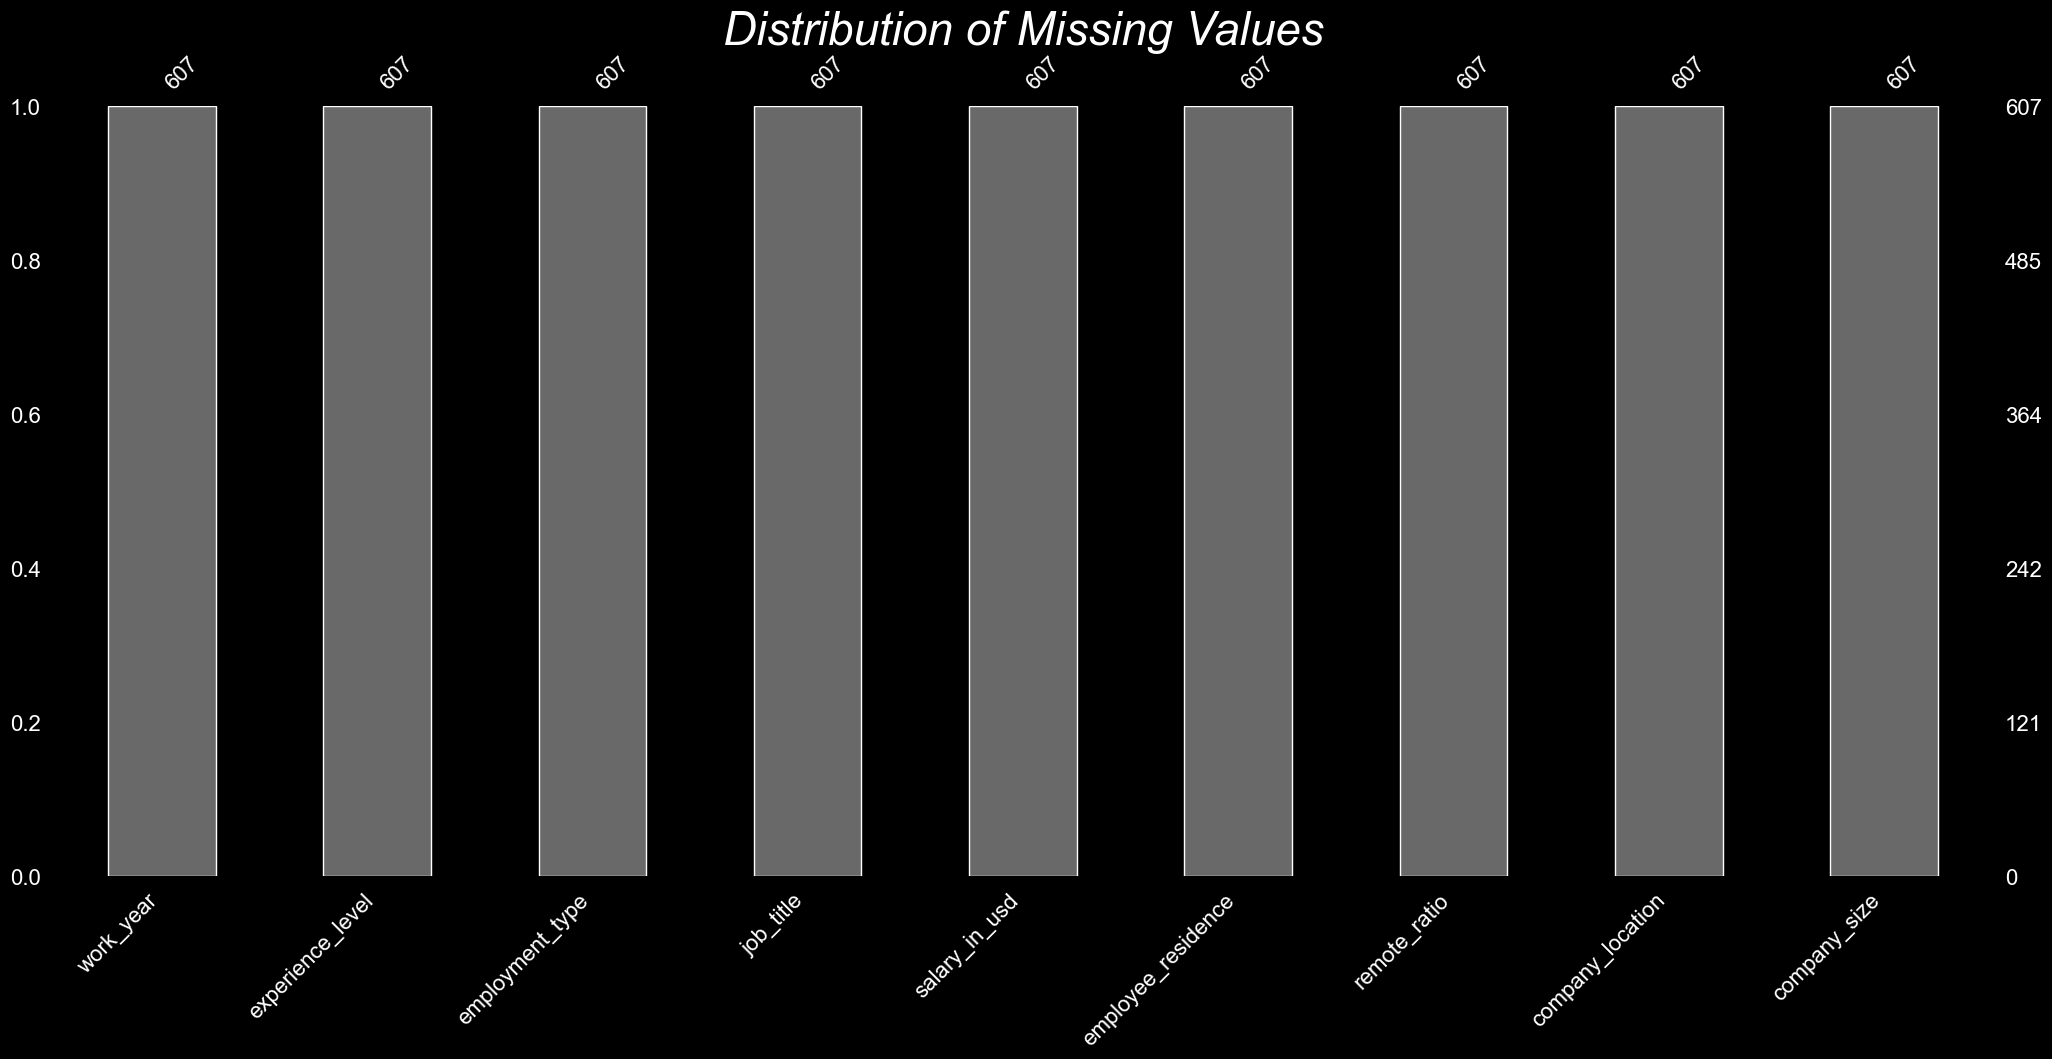

In [10]:
msno.bar(df)
plt.title('Distribution of Missing Values', fontsize=33, fontstyle='oblique')


📌 **Observation**

It is clear, there are **no missing values** in the dataset.

<h3 style="text-align: center;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">5. Univariate Analysis of each Feature (Categorical & Numeric) 📊 </h3>

In this section, we'll explore each feature in the dataset to understand the distributions, and get some insights. There're two categories we'll be dealing with, `categorical features`, and `numerical features`.

In [11]:
# Helper Function

def summarize_dataframe(df):
    """
    This function summarizes a pandas DataFrame. It prints the total number of records and columns,
    lists all numerical and categorical attributes, and prints each attribute with its number.

    Parameters:
    df (DataFrame): The DataFrame to summarize

    Returns:
    None
    """

    # Print the number of records and columns
    print(f"\nThere are {len(df)} records and {len(df.columns)} features/columns/attributes")

    # Define the numeric features
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

    # Define the categorical features
    categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Print the number of numerical attributes and each attribute
    print(f"\nThere are {len(numeric_features)} numerical attributes: \n")
    for i, feature in enumerate(numeric_features, 1):
        print(f"{i}. {feature}\n")

    # Print the number of categorical attributes and each attribute
    print(f"\nThere are {len(categorical_features)} categorical attributes: \n")
    for i, feature in enumerate(categorical_features, 1):
        print(f"{i}. {feature} \n")

In [12]:
# Let's see what our features look like
summarize_dataframe(df)


There are 607 records and 9 features/columns/attributes

There are 3 numerical attributes: 

1. work_year

2. salary_in_usd

3. remote_ratio


There are 6 categorical attributes: 

1. experience_level 

2. employment_type 

3. job_title 

4. employee_residence 

5. company_location 

6. company_size 



<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">5.1.  Categorical Column: Experience Level 🧟 </h3>

In [13]:
set(df['experience_level'].unique())

{'EN', 'EX', 'MI', 'SE'}

📌  **Experience Levels**

There're `4 abbreviated categorical values` for the experience level column

* `EN` - Entry-Level/Junior
* `MI` - Mid-Level/Intermediate
* `SE` - Senior-Level/Expert
* `EX` - Executive-Level/Director

In [14]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = '5.1. Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">5.2.  Categorical Column: Job Titles 👔 </h3>

In [15]:
df['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

📌 Observation

Upon inspecting the 'job_title' column in the dataset, it was found that there was a high level of granularity in the job titles. In other words, there were many different job titles that effectively represented similar roles. For example, 'Principal Data Scientist', 'Applied Data Scientist', 'Data Science Manager', and 'Lead Data Scientist' all fall under the broad category of 'Data Scientist' roles.

This high level of granularity in the job titles could potentially hinder a clear and comprehensive analysis of the data. For instance, if we were trying to understand the distribution of job postings across different roles, the multitude of job titles could lead to a fragmented view.

💡 Inference

To address this, we decided to create a mapping that would group similar job titles into broader categories. For instance, all data scientist roles, irrespective of seniority, were grouped under 'Data Scientist'. However, to maintain the distinction between individual contributor roles and managerial roles, we created separate categories for 'Data Science Manager', 'Data Engineering Manager', and 'Machine Learning Manager'.

For 'Data Analyst' roles, we grouped them into two categories - 'Data Analyst' for individual contributor roles and 'Data Analytics Manager' for managerial roles. Similarly, we grouped 'Data Engineer' roles into 'Data Engineer' and 'Data Engineering Manager' categories.

For specialist roles in machine learning, we created separate categories for 'Machine Learning Scientist', 'Machine Learning Engineer', and 'Machine Learning Manager'. We also created distinct categories for 'Data Architect', 'Computer Vision Engineer', 'NLP Engineer', 'AI Scientist', 'Research Scientist', and 'Applied Scientist'.

The mapping was applied to the 'job_title' column, effectively generalizing the job titles into more broad and analytically useful categories. This approach should provide a more clear and consolidated view of the job roles in the dataset, aiding in further analysis.


In [16]:
# mapping the new classification type
employment_classification = {
    'Data Scientist':'Data Scientist',
    'Principal Data Scientist':'Data Scientist',
    'Applied Data Scientist':'Data Scientist',
    'Staff Data Scientist':'Data Scientist',
    'Lead Data Scientist':'Data Scientist',
    'Product Data Scientist':'Data Scientist',
    'Data Specialist':'Data Scientist',
    'Data Science Consultant': 'Data Scientist',

    'Data Science Manager':'Data Science Manager',
    'Head of Data Science':'Data Science Manager',
    'Director of Data Science':'Data Science Manager',
    'Data Scientist Lead':'Data Science Manager',
    'Data Science Lead':'Data Science Manager',
    'Head of Data': 'Data Science Manager',
    
    'Data Analyst':'Data Analyst',
    'Business Data Analyst':'Data Analyst',
    'BI Data Analyst':'Data Analyst',
    'Lead Data Analyst':'Data Analyst',
    'Data Analytics Engineer':'Data Analyst',
    'Marketing Data Analyst':'Data Analyst',
    'Financial Data Analyst':'Data Analyst',
    'Finance Data Analyst':'Data Analyst',
    'Principal Data Analyst':'Data Analyst',
    'Data Operations Analyst':'Data Analyst',
    'Power BI Developer':'Data Analyst',

    'Data Analytics Manager':'Data Analytics Manager',
    'Data Analytics Lead':'Data Analytics Manager',
    'Analytics Engineer':'Data Analytics Manager',
    'Data Analytics Consultant':'Data Analytics Manager',
    'Product Data Analyst':'Data Analytics Manager',

    'Data Engineer':'Data Engineer',
    'Big Data Engineer':'Data Engineer',
    'Principal Data Engineer':'Data Engineer',
    'Data Operations Engineer':'Data Engineer',
    'Lead Data Engineer':'Data Engineer',
    'ETL Developer':'Data Engineer',
    'Data Science Engineer': 'Data Engineer',

    'Data Engineering Manager':'Data Engineering Manager',
    'Director of Data Engineering':'Data Engineering Manager',
    'Cloud Data Engineer':'Data Engineering Manager',
    'Data Science Tech Lead':'Data Engineering Manager',
    'Data Manager':'Data Engineering Manager',
    
    'Machine Learning Scientist':'Machine Learning Scientist',
    'Applied Machine Learning Scientist':'Machine Learning Scientist',
    'Machine Learning Research Engineer':'Machine Learning Scientist',

    'Head of Machine Learning':'ML Manager',
    'Machine Learning Manager':'ML Manager',

    'Machine Learning Engineer':'Machine Learning Engineer',
    'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
    'ML Engineer':'Machine Learning Engineer',
    'Lead Machine Learning Engineer':'Machine Learning Engineer',
    'Machine Learning Developer':'Machine Learning Engineer',
    
    'Data Architect':'Data Architect',
    'Cloud Data Architect':'Data Architect',
    'Principal Data Architect':'Data Architect',
    'Big Data Architect':'Data Architect',
    
    'Computer Vision Engineer':'Computer Vision Engineer',
    'Computer Vision Software Engineer':'Computer Vision Engineer',
    '3D Computer Vision Researcher':'Computer Vision Engineer',
    
    'NLP Engineer':'NLP Engineer',
    'AI Scientist':'AI Scientist',
    'Research Scientist':'Research Scientist',
    'Applied Scientist':'Applied Scientist',
}

df['job_title'] = df['job_title'].map(employment_classification)

Text(0.5, 1.0, 'Distribution of Missing Values')

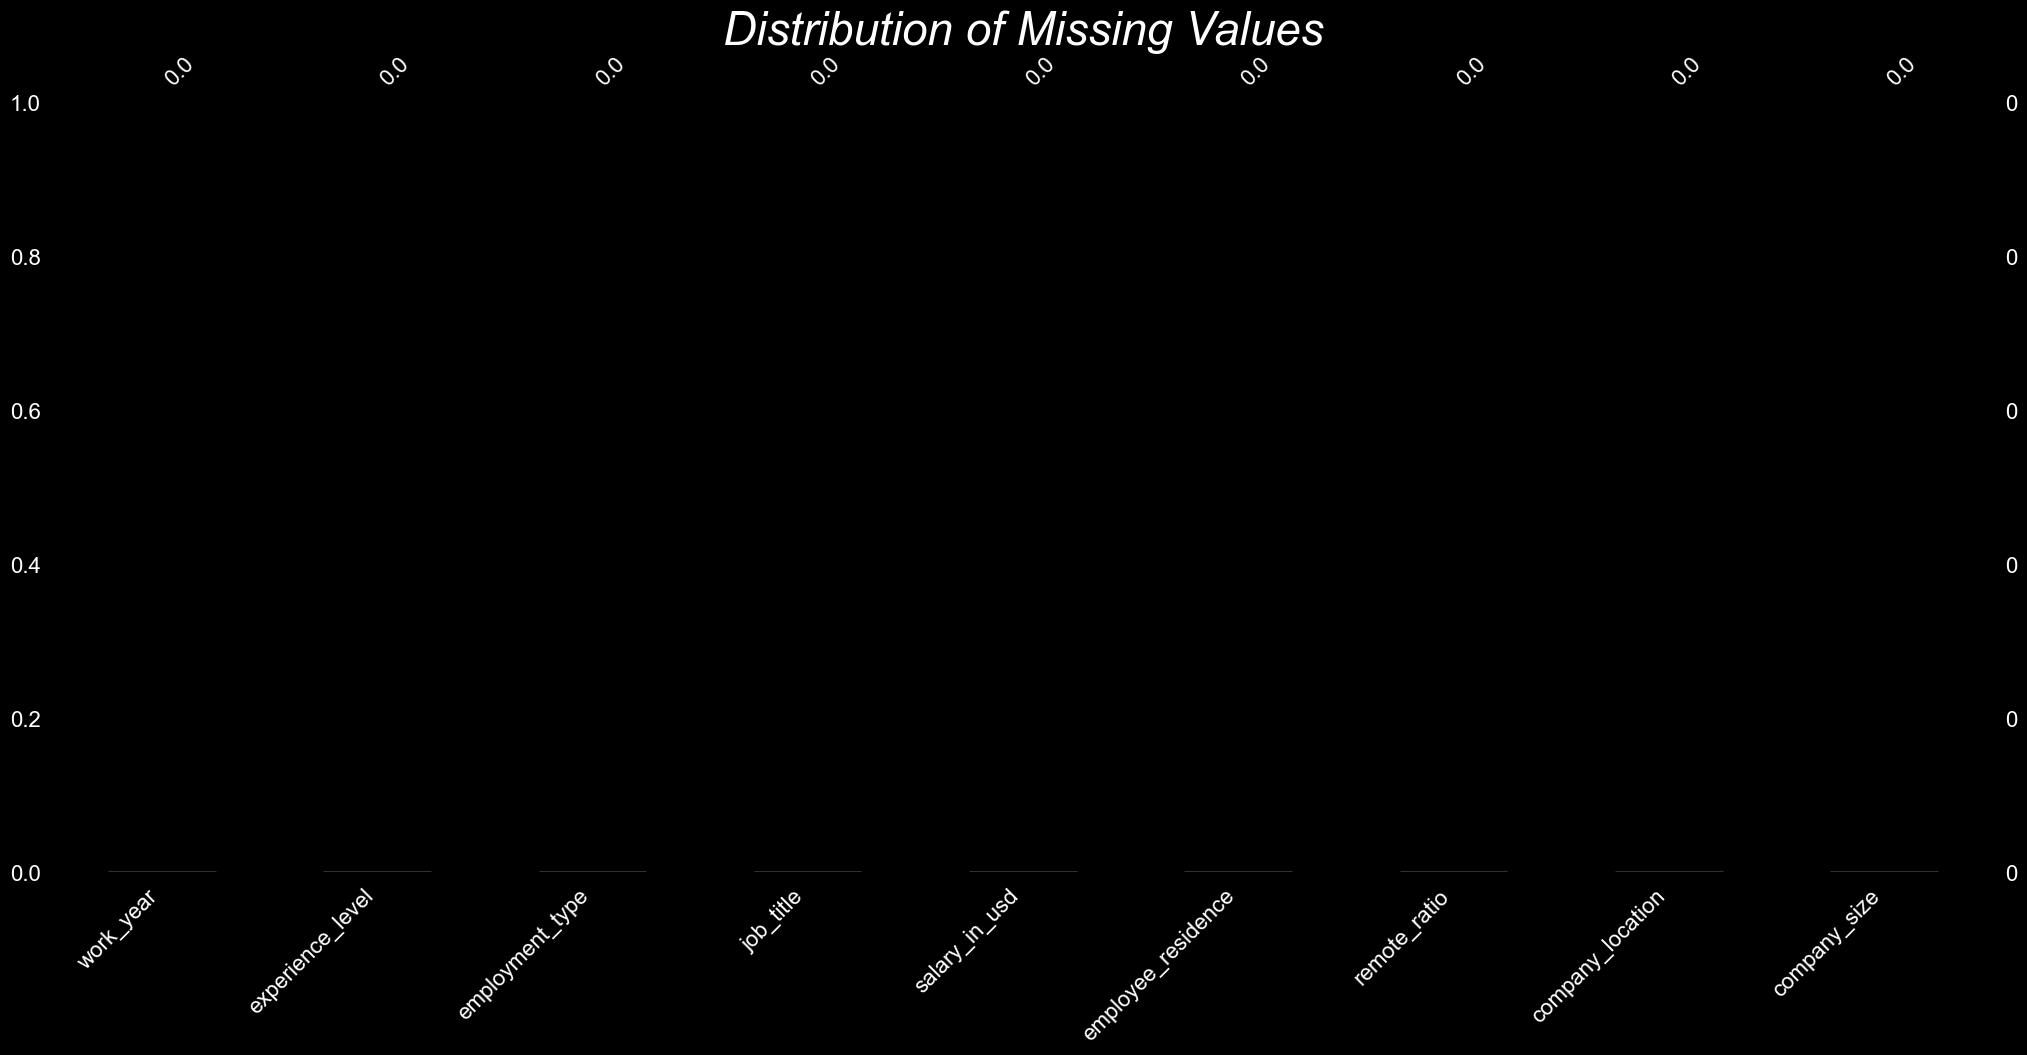

In [17]:
# Rows where 'job_title' is an empty string
missing_job_titles = df[df['job_title'].isna()]

msno.bar(missing_job_titles)
plt.title('Distribution of Missing Values', fontsize=33, fontstyle='oblique')


📌 It is clear, there are **no missing records** in the mapping.

In [18]:
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= '5.2.1 Top 10 Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [19]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

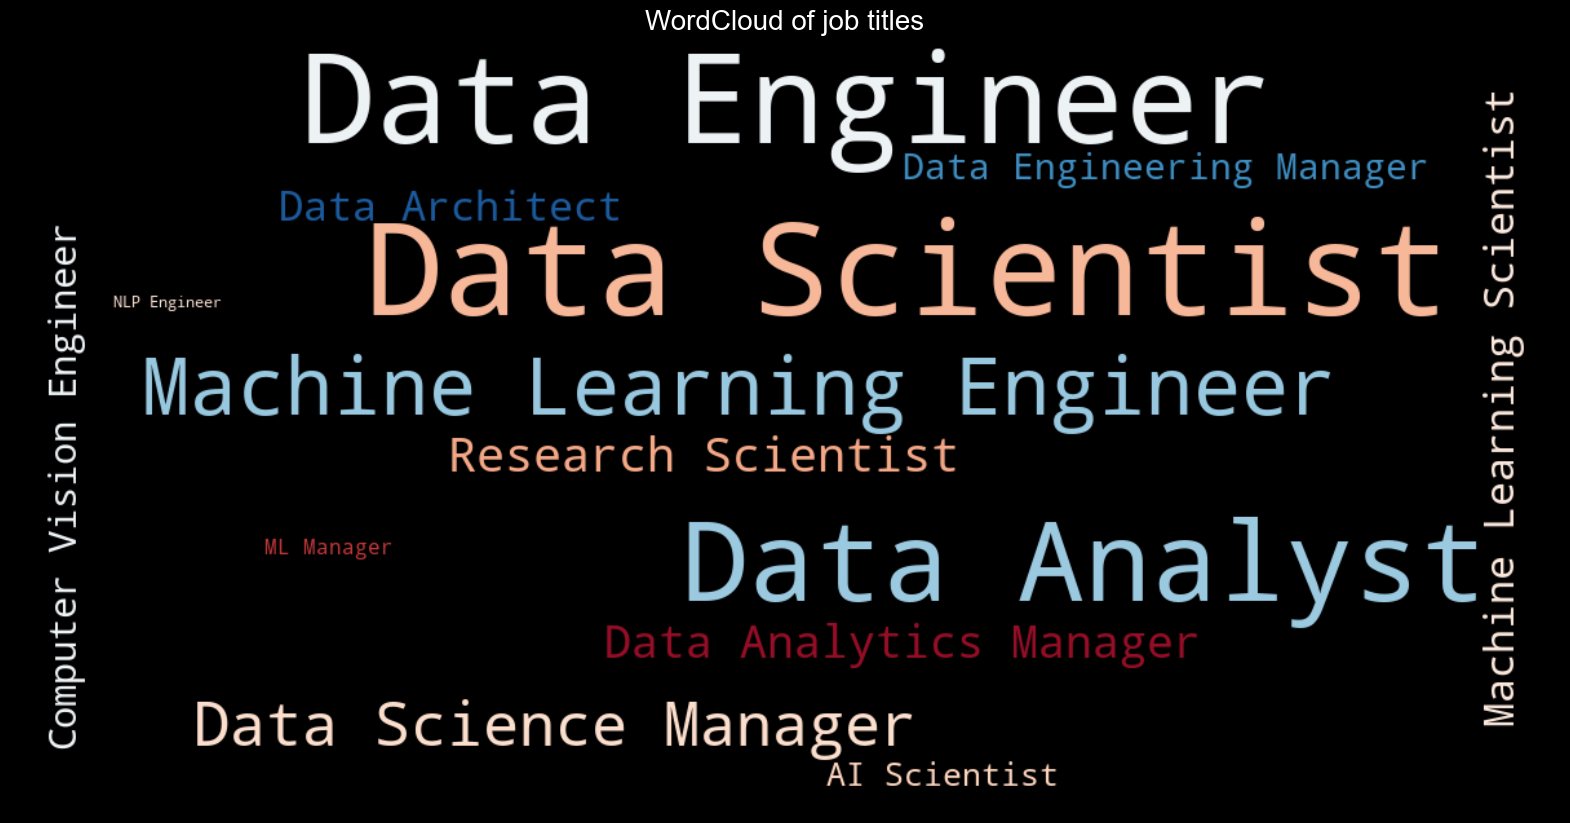

In [20]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

📌 **Observation**

`Data Scientist` roles appear to be the most common, with `167 instances`. This suggests that this is a prevalent job title in the dataset and might represent a significant portion of the data science job market

`Data Engineer` and `Data Analyst` roles are the next most common, with `154` and `121` instances respectively. This demonstrates the demand for these roles, as they are vital in data handling, preparation, and analysis - all key components of data science projects.

Roles related to machine learning, including `Machine Learning Engineer` and `Machine Learning Scientist`, are less common, suggesting that these positions might require more specialized skill sets or that the market for these roles is smaller.

Managerial roles like `Data Science Manager`, `Data Analytics Manager`, and `Data Engineering Manager` are even less frequent, which is logical as organizations typically have fewer management-level roles compared to individual contributor roles.

Finally, very specialized roles like `Computer Vision Engineer`, `AI Scientist`, and `NLP Engineer` are the least common. This could suggest either a smaller market for these specialized roles, higher requirements in terms of skills and experience, or that such roles are often embedded within broader titles and thus aren't separately listed as often.

💡 **Inference**

* This distribution provides insight into the prevalence and demand for different data science roles. However, it's important to remember that this distribution is influenced by the specific dataset, and actual job market distributions may vary.


<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">5.3.  Categorical Column: Employment Type 👔 </h3>

In [21]:
set(df['employment_type'].unique())

{'CT', 'FL', 'FT', 'PT'}

There're 4 abbreviated employment types:

* `CT`: Contract
* `FL`: Freelance
* `FT`: Full-time
* `PT`: Part-time

In [22]:
# Employment type
df['employment_type'] = df['employment_type'].replace(['PT', 'FT', 'CT', 'FL'], ['Part Time', 'Full Time', 'Contract', 'Freelance'])

type_grouped = df['employment_type'].value_counts()

fig = px.bar(x = ['Part Time', 'Full Time', 'Contract', 'Freelance'], y = type_grouped.values, 
       color = type_grouped.index, 
       color_discrete_sequence=px.colors.sequential.PuBuGn,
       template = 'plotly_dark',
       text = type_grouped.values, title = '2.1.3. Employment Type Distribution')
fig.update_layout(
    xaxis_title="Employment Type",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.update_traces(width=0.5)
fig.show()

In [23]:
df['employment_type'].value_counts()

employment_type
Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: count, dtype: int64

📌 Observation

* **`Full Time`**: A vast majority of the positions (`588 out of 607` total entries, which is approximately `97%`) are full-time. This is typical for many industries, including data science, where full-time positions are often preferred because they provide stability, allow for long-term projects, and enable the development of a team with deep knowledge about the company and its data.

* **`Part Time`**, **`Contract`**, and **`Freelance`**: These other types of employment constitute a very small fraction of the total positions (`approximately 3%`). This suggests that part-time, contract, or freelance work is less common in the data science field, at least within the context of this dataset.

`Part-time roles` may be less common because data science work often requires substantial time investment to understand complex systems, clean and preprocess data, build and validate models, and interpret results.

`Contract` and `freelance positions` might be less common due to the need for consistency in handling sensitive data and maintaining data pipelines over time, tasks that are typically better suited to full-time roles.

💡 **Inference**

* These findings might be reflective of the data science job market overall, or they might be specific to the dataset at hand. It's also worth noting that the trends in employment types can change over time and may vary by region, company size, and industry.

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">5.4.  Categorical Column: Company Location, and Employee Residence 📍 </h3>

We'll explore the `locations of the companies and employees` by plotting map & bar charts.

In [24]:
# First let's get a feel of the locations
df['company_location'].value_counts()[:10]

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: count, dtype: int64

In [25]:
# Convert country into choropleth readable type

converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country

# Map

company_locations_grouped = df['company_location'].value_counts()
fig = px.choropleth(locations=company_locations_grouped.index,
                   color=company_locations_grouped.values,
                   color_continuous_scale=px.colors.sequential.YlGn,
                   template='plotly_dark',
                   title='5.4.1 Company Location Distribution Map')

fig.update_layout(font=dict(size=18, family="Franklin Gothic"))
fig.show()

📌 **Observation**

Most employers are from the `US`

In [26]:
top_10_employer_location = company_locations_grouped[:10]
fig = px.bar(y=top_10_employer_location.values,
            x=top_10_employer_location.index,
            color=top_10_employer_location.index,
            color_discrete_sequence=px.colors.sequential.deep,
            text=top_10_employer_location.values,
            title='5.4.2 Top 10 Employer Locations',
            template='plotly_dark')
fig.update_layout(xaxis_title="Company Location",
                 yaxis_title="Frequency",
                 font=dict(size=17, family="Franklin Gothic"))
fig.show()

📌 **Observation**

**`United States (USA) Dominance`**: The USA hosts the largest number of companies in this dataset with `355 companies`. This dominance is likely because the USA is one of the primary hubs for tech companies and startups, where data science roles are highly prevalent. Many global tech giants are headquartered in the USA, and the country has a high demand for data science roles.

**`European Presence`**: Following the USA, several European countries such as the UK (`47 companies`), Germany (`28 companies`), France (`15 companies`), Spain (`14 companies`), and others also host data science companies. The UK and Germany's high presence in the list could be because these two countries are the largest economies in Europe and have a strong tech sector.

**`Emerging Markets`**: Countries like India (`24 companies`), China (`2 companies`), and Brazil (`3 companies`) represent emerging markets where the tech industry is growing rapidly.


💡 **Inference**

* Please note that these observations are based on the provided dataset and might not completely represent the actual global distribution of data science companies.


**Let's compare employee residence and employer locations.**

In [27]:
converted_employee_residence_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_employee_residence_country
converted_employee_residence_country_count = df['employee_residence'].value_counts()
top_10_employee_residence = converted_employee_residence_country_count[:10]

fig = go.Figure(data=[
    go.Bar(name='Company Location',
          x=top_10_employer_location.index,
          y=top_10_employer_location.values,
          text=top_10_employer_location.values,
          marker_color='crimson'),
    go.Bar(name='Employee Residence',
          x=top_10_employee_residence.index,
          y=top_10_employee_residence.values,
          text=top_10_employee_residence.values,
          marker_color='white')
])

fig.update_layout(barmode='group',
                 xaxis_tickangle=-45,
                 title='5.4.3 Compare Company Location and Employee Residence',
                 template='plotly_dark',
                 font=dict(size=18, family="Franklin Gothic"))

fig.show()


📌 Observation

`Majority Reside in the Same Country`: In countries with a higher count like USA, GBR, CAN, DEU, the number of employee residences is close to the number of company locations. This suggests that a majority of employees live in the same country where the company is located. This could be due to various factors, such as the availability of local talent, immigration policies, or the convenience of working in the same time zone.

`Remote Work or Cross-border Commuting`: For some countries like IND, FRA, ESP, GRC, and JPN, the number of employee residences is slightly higher than the number of company locations. This could indicate a certain degree of remote work or cross-border commuting. For example, employees might be working for a company located in a different country, or the company might have several remote employees living in different countries.

`Unique Cases`: In the case of NLD (Netherlands), there are company locations but no employee residences listed. On the contrary, in PRT (Portugal), there are employee residences but no company locations listed. These discrepancies could be due to a variety of reasons: the company might have a branch office in these countries but the employees could be residing in different countries (remote work), or the company headquarters is in a different country, and employees commute for work, or it might be a data collection or reporting issue.

💡 Inference

* These observations give us an insight into the global nature of the data science job market and the possibility of remote work. However, for more accurate conclusions, it would be useful to have more detailed data such as the exact location of work (office vs. home) and the proportion of employees who commute or work remotely.

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">5.5.  Categorical Column: Company Size 🍩 </h3>

In [28]:
df['company_size'].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

There're 3 abbreviated types of Company Sizes:

* `M`: Medium
* `L`: Large
* `S`: Small

In [29]:
# Company Size
df['company_size'] = df['company_size'].replace(['L', 'M', 'S'], ['Large', 'Medium', 'Small'])

company_size_grouped = df['company_size'].value_counts()

fig = px.bar(x=company_size_grouped.index,
            y=company_size_grouped.values,
            color=company_size_grouped.index,
            color_discrete_sequence=px.colors.sequential.dense,
            text=company_size_grouped.values,
            title='5.5.1 Distribution of Company Size',
            template='plotly_dark')

fig.update_traces(width=0.5)
fig.update_layout(xaxis_title="Company Size",
                 yaxis_title="Frequency",
                 font=dict(size=18, family="Franklin Gothic"))

fig.show()


📌 **Observation**

* `Medium Companies Dominate`: There are more data science job positions in medium-sized companies (`326`) than any other size. This might be because medium-sized companies have reached a stage of growth where data science becomes necessary, yet they are still growing, which might result in more job opportunities.

* `Large Companies Follow`: Large companies come next (`198`). Larger companies typically have more resources and established data science departments. However, because they're also more stable, they might not be creating as many new roles compared to the growing medium-sized companies.

* `Small Companies Have Fewest`: Small companies have the fewest data science roles (`83`). This might be because small companies do not have the resources to invest heavily in data science, or their data needs are not complex enough to warrant a full data science team. Alternatively, it might be the case that small companies do hire data scientists, but they do so less frequently or the positions are not advertised widely.

💡 **Inference**

* These observations highlight the potential trend that job seekers in the data science field might find more opportunities within medium and large-sized companies. However, this doesn't necessarily mean that these companies offer the best roles. The quality of a data science role often depends on factors such as the company's data maturity, the team's skills, and the company's understanding of the value of data science.

<h3 style="text-align: center;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">6.  Exploring Numeric Columns 🔢 </h3>

There are 3 numerical attributes: 

1. `work_year`: The year salary was paid

2. `salary_in_usd`: The salary in USD

3. `remote_ratio`: The total amount of work done remotely

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">6.1.  Numeric Column: Work Year 📆 </h3>

In [30]:
df['work_year'].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

In [31]:
work_year_count = df['work_year'].value_counts()
fig = px.pie(values=work_year_count.values,
            names=work_year_count.index,
            color_discrete_sequence=px.colors.sequential.PuBu,
            title='6.1.1 Work Year Distribution',
            template='plotly_dark')
fig.data[0].marker.line.width=2
fig.data[0].marker.line.color='gray'
fig.update_layout(font=dict(size=20, family="Franklin Gothic"))
fig.show()

📌 **Observation**

* `Rapid Increase in Data Science Roles`: The number of data science job positions has been increasing significantly year by year. There were only `72 job positions in 2020`, which grew to `217 in 2021`, and further escalated to `318 in 2022`. This rapid increase suggests that the demand for data science skills is growing fast.

* `2022 Saw Most Positions`: The year 2022 saw the most job positions with a count of `318`. This could be due to a growing recognition of the importance of data science in business decision-making and strategy. It's also possible that the economic recovery from the COVID-19 pandemic has led to more hiring in this sector.

* `Least in 20201`: The year 2020 had the least number of job positions (`72`). This could be due to the impacts of the COVID-19 pandemic which might have led many companies to freeze hiring, reduce their workforce, or shift their focus to more immediate concerns.


<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">6.2.  Numeric Column: Salary in USD 💰</h3>

In [32]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [33]:
# Let's see the distribution of salaries with the Box Plot
fig_1 = px.box(
    df,  # The DataFrame
    y='salary_in_usd',  # The column to create the box plot
    template='plotly_dark',  # The visual theme of the plot
    title='6.2.1. Salary in USD (Box Plot)'  # The title of the plot
)

# Update the layout of the plot
fig_1.update_layout(
    font = dict(size=17, family="Franklin Gothic"),  # The font size and type
    yaxis_title="Salary in USD"  # The title for the y-axis
)

# Display the plot
fig_1.show()

In [34]:
# Create a histogram with a rug plot in the margin using Plotly Express
fig_2 = px.histogram(
    df,  # The DataFrame
    x="salary_in_usd",  # The column to use for the histogram
    nbins=100,  # The number of bins to use in the histogram
    marginal="rug",  # The type of plot to display in the margin
    title='6.2.2.Salary in USD (DistPlot)',  # The title of the plot
    template='plotly_dark'  # The visual theme of the plot
)

# Update the layout of the plot
fig_2.update_layout(
    font = dict(size=17, family="Franklin Gothic")  # Update the font of the plot
)

# Display the plot
fig_2.show()

📌 **Observation**

The distribution is right skewed.

The bulk of the observations are small/medium, with a few observations that are much larger than the rest. Most people earn in the low/medium range of salaries, with a few exceptions (CEOs, Executives.) that are distributed along a large range (long “tail”) of higher values.

 **salary_in_usd**: The salary_in_usd has a wide range, from as low as `$2,859` to as high as `$600,000`. The average salary for the jobs in this dataset is about `$112,297.87`, with a standard deviation of `$70,957.26`, suggesting significant salary disparities across jobs. The median salary (the `50%` percentile) is `$101,570`, which is slightly lower than the mean, indicating a skewed distribution with a longer tail on the right (i.e., some very high salaries are pulling the average up).
 
 `$100k to $150k` is where most of the salaries are distributed.
 
 `$300k to $600k` are quite outliers, could be a senior executive.

<h3 style="text-align: left;background-color: pink; font-family:Times New Roman; color: blue; padding: 14px; line-height: 1; border-radius:10px">6.3.  Numeric Column: Remote Ratio 💻</h3>

In [35]:
df['remote_ratio'].value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

Remote ratio consists of 3 values: 

1. `0`: `No remote work`
1. `50`: `Partially remote work`
1. `100`: `Fully remote work`

In [36]:
# Map remote_ratio values to corresponding labels in work_type
remote_ratio_mapped = df['remote_ratio'].map({100: 'Fully Remote', 0: 'No Remote Work', 50: 'Partially Remote'})

# Calculate counts of each remote type
work_type_count = remote_ratio_mapped.value_counts()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Remote Type': work_type_count.index, 'Count': work_type_count.values})

# Create a bar plot with Plotly
fig = px.bar(plot_data,
             x='Remote Type',
             y='Count',
             color='Remote Type',
             color_discrete_sequence=px.colors.sequential.dense,
             text='Count',
             title='6.3.1 Remote Ratio Distribution',
             template='plotly_dark')
fig.update_traces(marker_line_width=2, width=0.5)
fig.update_layout(xaxis_title="Remote Type",
                  yaxis_title="Count",
                  font=dict(size=18, family="Franklin Gothic"))
fig.show()

📌 **Observation**

* `The majority of jobs in the dataset are fully remote (100%)`, accounting for `381 out of 607 entries`. This means over `60%` of the positions allowed employees to work from home all the time.

* `Around 21% of the jobs (127 out of 607)` did not allow for remote work at all (`0%`).

* `Approximately 16% of the jobs (99 out of 607)` allowed for partial remote work (`50%`). These could be jobs where employees are expected to come into the office for a part of the week, and can work from home for the rest.


💡 **Inference**

* From these observations, we can infer a significant shift towards remote work, most likely due to changes in working conditions driven by factors such as the Covid-19 pandemic or advances in technology making remote work more feasible.


* On the other hand, it's also notable that a not insignificant proportion of jobs don't allow for remote work at all, highlighting that there are still many roles that require physical presence.

* The fact that there's also a substantial proportion of jobs allowing partial remote work indicates that many employers may be opting for a hybrid model, balancing the benefits of remote work with the advantages of in-person interaction.

* In any case, these figures are likely to be industry and role specific, and it would be interesting to explore how they vary across different job titles and sectors.